# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp

2025-03-04 22:05:10.087 INFO: Executing plan <generator object Agent.learn at 0x7fd4c8ab83c0>


2025-03-04 22:05:10.090 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fd3b44fb5e0> from 'idle' -> 'running'


2025-03-04 22:05:10.092 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 22:05:10

Persistent Unique Scan ID: '69e81386-89fe-4fdd-af49-eaa89790328f'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |  brownian2 |  brownian1 |         x3 |

+-----------+------------+------------+------------+------------+------------+------------+

|         1 | 22:05:10.2 |     -1.083 |      0.411 |     -0.003 |      0.037 |      0.000 |

|         2 | 22:05:10.7 |     -1.496 |     -0.344 |     -0.147 |      0.152 |      0.000 |

|         3 | 22:05:11.2 |      0.930 |     -1.451 |     -0.469 |      0.379 |      0.000 |

|         4 | 22:05:11.7 |     -0.592 |     -4.987 |     -0.711 |      0.511 |      0.000 |

|         5 | 22:05:12.3 |     -2.721 |     -2.639 |     -0.721 |      0.631 |      0.000 |

|         6 | 22:05:13.0 |     -4.248 |     -2.069 |     -0.602 |      0.493 |      0.000 |

|         7 | 22:05:13.4 |     -4.700 |      2.573 |     -0.981 |      0.444 |      0.000 |

|         8 | 22:05:13.9 |     -3.172 |      2.138 |     -1.242 |      0.284 |      0.000 |

|         9 | 22:05:14.5 |     -1.987 |      4.918 |     -0.563 |     -0.163 |      0.000 |

|        10 | 22:05:15.0 |      0.131 |      3.127 |     -0.408 |     -0.365 |      0.000 |

|        11 | 22:05:15.6 |      2.884 |      4.227 |     -0.562 |     -0.001 |      0.000 |

|        12 | 22:05:16.2 |      1.649 |      1.540 |     -0.336 |      0.099 |      0.000 |

|        13 | 22:05:17.0 |      3.778 |      1.067 |      0.085 |     -0.002 |      0.000 |

|        14 | 22:05:17.6 |      3.643 |     -0.981 |     -0.144 |     -0.089 |      0.000 |

|        15 | 22:05:18.4 |      2.448 |     -3.214 |      0.286 |     -0.067 |      0.000 |

|        16 | 22:05:19.1 |      4.537 |     -4.315 |      0.771 |      0.128 |      0.000 |

+-----------+------------+------------+------------+------------+------------+------------+

generator list_scan ['69e81386'] (scan num: 1)

/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:171: RuntimeWarning: invalid value encountered in scalar divide
  results = [np.sum(input * grids[dir].astype(float), labels, index) / normalizer for dir in range(input.ndim)]


2025-03-04 22:05:21.866 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fd3b44fb5e0> from 'running' -> 'idle'


2025-03-04 22:05:21.869 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fd4c8ab83c0>


('69e81386-89fe-4fdd-af49-eaa89790328f',)

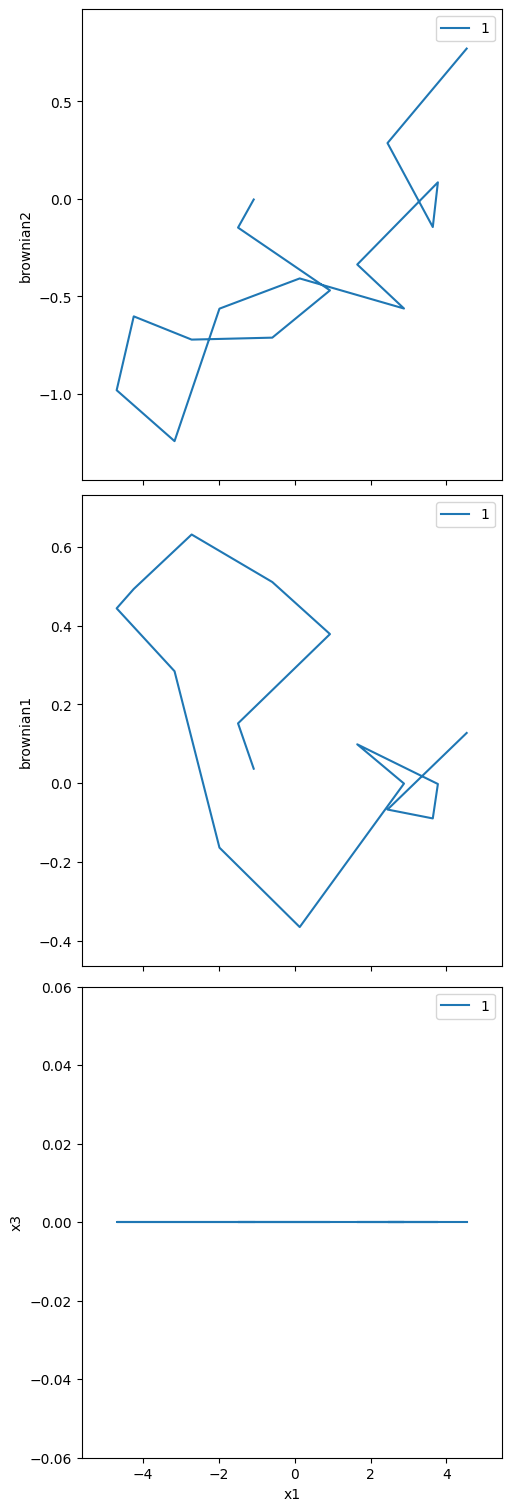

In [2]:
from blop import DOF, Agent, Objective
from blop.digestion.tests import constrained_himmelblau_digestion
from blop.dofs import BrownianMotion

dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

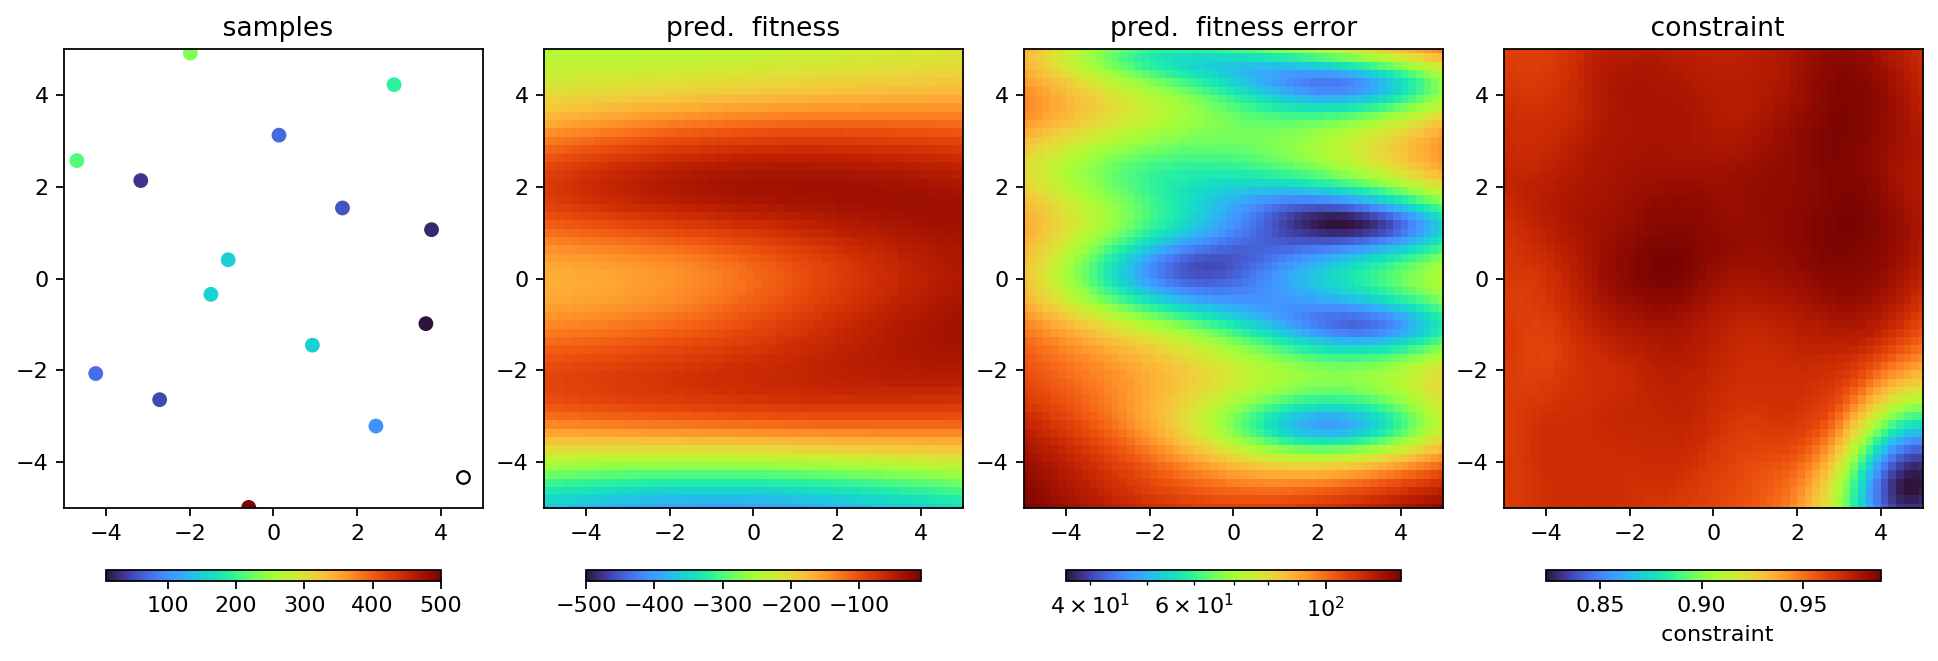

In [3]:
agent.plot_objectives()